In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [2]:
path = "/media/drc/DATA/chris_labelfusion/logs_test/2017-06-16-15/images/"

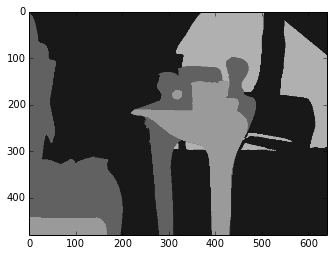

In [131]:
plt.imshow(np.log(mpimg.imread(path+"0000003998depth_ground_truth.bmp")))

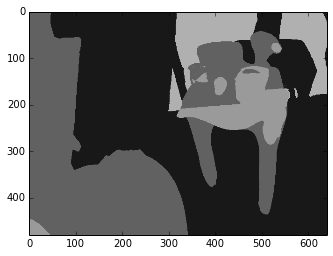

In [130]:
plt.imshow(np.log(mpimg.imread(path+"0000000001depth_ground_truth.bmp")))

In [3]:
def get_images(num,max_digits,path):
    depth_suffix = "_depth.png"
    color_suffix = "_rgb.png"
    shade_suffix = "_rgb_r.png"
    reflec_suffix = "_rgb_s.png"
    ground_truth = "_depth_gt.bmp"
    prefix = str(num).zfill(max_digits)
    img_d=mpimg.imread(path+prefix+depth_suffix)
    img_c=mpimg.imread(path+prefix+color_suffix)
    img_s=mpimg.imread(path+prefix+shade_suffix)
    img_r=mpimg.imread(path+prefix+reflec_suffix)
    img_gt=mpimg.imread(path+prefix+ground_truth_suffix)
    return [img_d,img_c,img_s,img_r]

In [111]:
d,c,s,r = get_images(1,10,path)
h,w = np.shape(d)

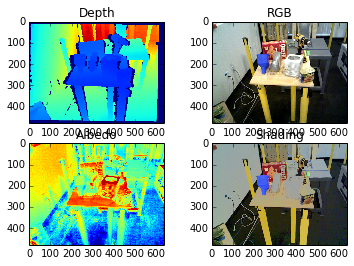

In [112]:
fig = plt.figure()
a=fig.add_subplot(2,2,1)
imgplot = plt.imshow(d)
a.set_title('Depth')
a=fig.add_subplot(2,2,2)
imgplot = plt.imshow(c)
a.set_title('RGB')
a=fig.add_subplot(2,2,3)
imgplot = plt.imshow(r)
a.set_title('Albedo')
a=fig.add_subplot(2,2,4)
imgplot = plt.imshow(s)
a.set_title('Shading')
plt.show()

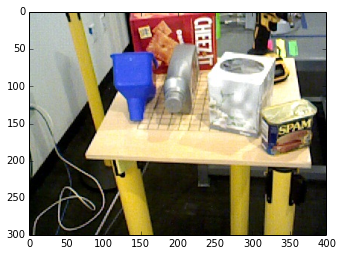

In [106]:
index = np.argwhere(d[:,:480]==0)
bounds=[100,400,100,500]
plt.imshow(c[bounds[0]:bounds[1],bounds[2]:bounds[3]])

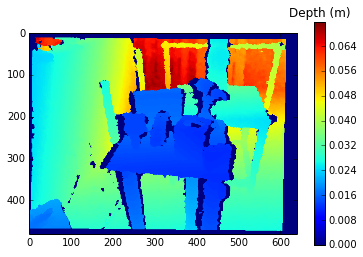

In [31]:
from matplotlib import cm
plt.imshow(d)
clb = plt.colorbar()
clb.ax.set_title('Depth (m)')

plt.show()

In [8]:
np.max(r),np.min(r),np.mean(r),np.std(r)

(1.0, 0.035294119, 0.53998214, 0.2025453)

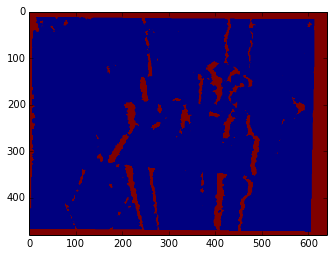

In [9]:
plt.imshow(d==0)

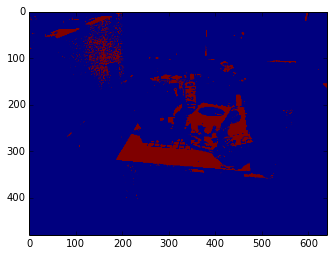

In [10]:
plt.imshow(r>.8)

In [12]:
def labeled_data(path,start=1,end=10,bounds=[100,400,100,500],file_digits=10):
    x = []
    y = []
    num_pos=0
    for i in range(start,end+1):
        d,c,s,r = get_images(i,file_digits,path)
        pos = np.argwhere(d[bounds[0]:bounds[1],bounds[2]:bounds[3]]==0)
        neg = np.argwhere(d[bounds[0]:bounds[1],bounds[2]:bounds[3]]!=0)[:len(pos)]
        
        data = map(lambda x: [s[x[0],x[1]]],pos)
        x.extend(data)
        num_pos+=len(data)
        y.extend([1]*len(data))
        
        data1 = map(lambda x: [s[x[0],x[1]]],neg)
        x.extend(data1)
        y.extend([0]*len(data1))  
    return x,y,num_pos

x,y,num_pos=labeled_data(path,1,2)

In [12]:
def labeled_data(path,start=1,end=10,bounds=[100,400,100,500],file_digits=10):
    x = []
    y = []
    num_pos=0
    for i in range(start,end+1):
        d,c,s,r = get_images(i,file_digits,path)
        pos = np.argwhere(d[bounds[0]:bounds[1],bounds[2]:bounds[3]]==0)
        neg = np.argwhere(d[bounds[0]:bounds[1],bounds[2]:bounds[3]]!=0)
        data = zip(r[pos][0][0],np.mean(s[pos][0][0],axis=1))
        x.extend(data)
        num_pos+=len(data)
        y.extend([1]*len(data))
        data1 = zip(r[neg][0][0],np.mean(s[neg][0][0],axis=1))
        x.extend(data1)
        y.extend([0]*len(data1))     
    return x,y,num_pos

x,y,num_pos=labeled_data(path,1)
len(x),len(y)

(12800, 12800)

In [13]:
def inspect(path,num_images=10,bounds=[100,400,100,500],file_digits=10):
    reflect = []
    shade = []
    for i in range(1,num_images+1):
        d,c,s,r = get_images(i,file_digits,path)
        index = np.argwhere(d[bounds[0]:bounds[1],bounds[2]:bounds[3]]==0)
        print r[index][0][0]
        reflect.append(r[index][0][0])
        shade.append(s[index][0][0])
    return reflect,shade

reflect,shade = inspect(path,2)

np.mean(reflect),np.mean(shade),np.std(reflect),np.std(shade)

[ 0.53333336  0.53333336  0.60784316  0.56862748  0.59215689  0.56862748
  0.65882355  0.55686277  0.40784314  0.59607846  0.5411765   0.49019608
  0.63921571  0.58431375  0.56862748  0.5411765   0.51372552  0.51372552
  0.51764709  0.51764709  0.52549022  0.53725493  0.50980395  0.56470591
  0.56078434  0.52549022  0.5529412   0.56078434  0.5411765   0.53333336
  0.53333336  0.55686277  0.55686277  0.57647061  0.57647061  0.60000002
  0.63921571  0.62352943  0.61960787  0.61960787  0.627451    0.62352943
  0.60392159  0.66274512  0.65490198  0.63921571  0.62352943  0.65882355
  0.62352943  0.66274512  0.66666669  0.64313728  0.64705884  0.63529414
  0.627451    0.63529414  0.627451    0.65098041  0.60000002  0.59607846
  0.58039218  0.68627453  0.69803923  0.7019608   0.71372551  0.63137257
  0.627451    0.61176473  0.63137257  0.63529414  0.63529414  0.65098041
  0.65098041  0.67450982  0.7019608   0.66274512  0.60392159  0.57254905
  0.5529412   0.57254905  0.54509807  0.59607846  0

(0.60149515, 0.54788196, 0.088457644, 0.14498085)

In [16]:
from sklearn import svm
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
clf = svm.SVC()
clf.fit(x, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
x_test,y_test,num_pos = labeled_data(path,3,4)

In [18]:
clf.score(X=x_test,y=y_test)

0.5554059485530547

In [53]:
clf.predict(X=[[.4]])

array([0])

In [15]:
count1=0
count2=0
for i in range(len(x)):
    if x[i]>.8:
        if y[i]==1: count1+=1
        else: count2+=1
count1/float(count2)

1.0

In [13]:
len(x),len(y)

(47450, 47450)

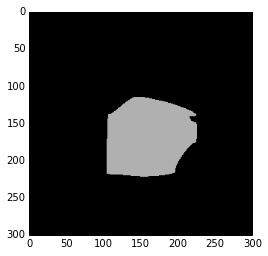

In [42]:
img=mpimg.imread("/home/drc/Chris/ZBuffer/build/depth.bmp")
plt.imshow(np.log(img))